### Test migration history reconstruction on ovarian cancer data

In [1]:
import sys
import os
from metient.util.globals import *
from metient.metient import *
import matplotlib

matplotlib.rcParams['figure.figsize'] = [3, 3]
custom_colors = ["#6aa84f","#c27ba0", "#be5742e1", "#6fa8dc", "#e69138", "#9e9e9e"]

repo_dir = os.path.join(os.getcwd(), "../")
MSK_MET_FN = os.path.join(repo_dir, 'data/msk_met/msk_met_freq_by_cancer_type.csv')
      
MCPHERSON_DATA_DIR = os.path.join(repo_dir, 'data', 'mcpherson_ovarian_2016')
TREE_DIR = os.path.join(MCPHERSON_DATA_DIR, 'orchard_trees')    
TSV_DIR = os.path.join(MCPHERSON_DATA_DIR, 'pyclone_clustered_tsvs')                 

OUTPUT_DIR = os.path.join(MCPHERSON_DATA_DIR, "metient_outputs")

PATIENT_IDS = [1,2,3,4,7,9]
print_config = PrintConfig(visualize=True, k_best_trees=20)


/lila/home/koyyald/mambaforge/envs/met/lib/python3.8/site-packages/torch/cuda/__init__.py:138: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 11070). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0


CUDA GPU: False


### Run all patients in calibrate mode

In [ ]:
mut_trees_fns = [os.path.join(TREE_DIR, f"patient{patient_id}.results.npz") for patient_id in PATIENT_IDS]
trees = [data[0] for data in get_adj_matrices_from_pairtree_results(mut_trees_fns)]
ref_var_fns = [os.path.join(TSV_DIR, f"{patient_id}_SNVs.tsv") for patient_id in PATIENT_IDS]
run_names = [f"{pid}_calibrate" for pid in PATIENT_IDS]
calibrate(trees, ref_var_fns, print_config, OUTPUT_DIR, run_names, bias_weights=False, batch_size=2000,custom_colors=custom_colors, solve_polytomies=False)


Saving results to /lila/data/morrisq/divyak/projects/metient/metient/jupyter_notebooks/../data/mcpherson_ovarian_2016/metient_outputs/calibrate
Overwriting existing directory at /lila/data/morrisq/divyak/projects/metient/metient/jupyter_notebooks/../data/mcpherson_ovarian_2016/metient_outputs/calibrate
Calibrating for patient: 1_calibrate
Restructuring adjacency matrix for 1_calibrate_right_ovary_site since root node is not at index 0


/lila/data/morrisq/divyak/projects/metient/metient/util/vertex_labeling_util.py:307: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(get_path_matrix(A.T, remove_self_loops=False), dtype = torch.float32)
  0%|          | 0/100 [00:00<?, ?it/s]

[0, 1, 3, 4, 5, 7, 8, 9, 10, 11, 12] [[0, 1, 2], [2], [0], [2], [0, 1], [0, 1, 2], [2], [2], [2], [1], [0, 1]]
known unkown [0, 2, 3, 10] [1, 4, 5, 6, 7, 8, 9, 11] [tensor([0., 0., 1.]), tensor([1., 0., 0.]), tensor([0., 0., 1.]), tensor([0., 1., 0.])]


/lila/data/morrisq/divyak/projects/metient/metient/util/vertex_labeling_util.py:298: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(get_path_matrix(A, remove_self_loops=True), dtype = torch.float32)
  1%|          | 1/100 [00:00<00:29,  3.36it/s]

### Run all patients in evaluate mode

In [ ]:
from metient.util import data_extraction_util as dutil

def run_evaluate(mut_trees_fn, ref_var_fn, weights, run_name):    
    _, _, _, unique_sites, _, _ = dutil.get_ref_var_omega_matrices(ref_var_fn)
    trees = get_adj_matrices_from_pairtree_results(mut_trees_fn)
    print("num trees:", len(trees))
    print(unique_sites)
   
    tree_num = 1
    for adj_matrix in trees[:1]:
        print(f"\nTREE {tree_num}")
        print(adj_matrix.shape)

        evaluate(adj_matrix, ref_var_fn, weights, print_config, OUTPUT_DIR, f"{run_name}_tree{tree_num}",
                 O=None, bias_weights=True, custom_colors=custom_colors, solve_polytomies=False)
        tree_num += 1


num trees: 48
['omentum_site', 'right_ovary_site', 'small_bowel_site']

TREE 1
torch.Size([30, 30])
Calculated batch size: 15872
Restructuring adjacency matrix for patient1_evaluate_tree1_right_ovary_site since root node is not at index 0
tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

/lila/data/morrisq/divyak/projects/metient/metient/util/vertex_labeling_util.py:307: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(get_path_matrix(A.T, remove_self_loops=False), dtype = torch.float32)
100%|██████████| 75/75 [01:46<00:00,  1.42s/it]


{'not primary single-source seeding': 10, 'primary single-source seeding': 9}
# final solutions: 7


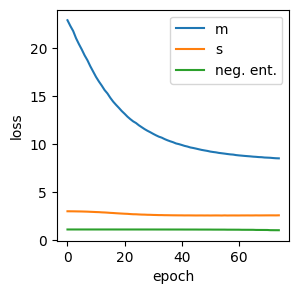

patient1_evaluate_tree1_right_ovary_site
20 unique trees were not found (7 were found). Retry with a higher sample size if you want to get more trees.


<Figure size 300x300 with 0 Axes>

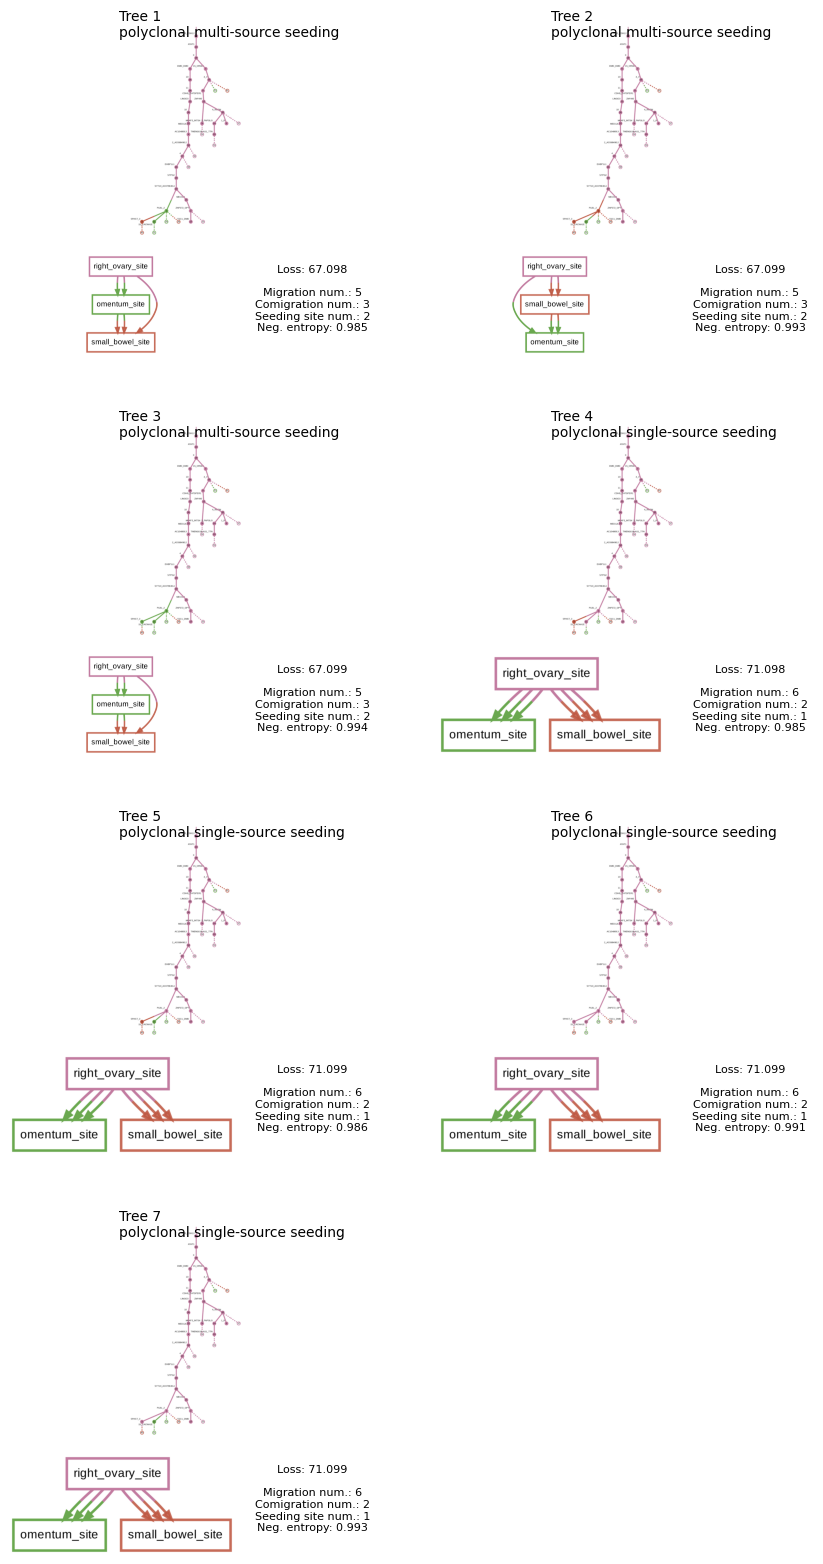

num trees: 16
['omentum_site', 'right_ovary_site']

TREE 1
torch.Size([14, 14])
Calculated batch size: 512
Restructuring adjacency matrix for patient2_evaluate_tree1_right_ovary_site since root node is not at index 0
tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

100%|██████████| 75/75 [00:23<00:00,  3.15it/s]


{'not primary single-source seeding': 8, 'primary single-source seeding': 5}
# final solutions: 1


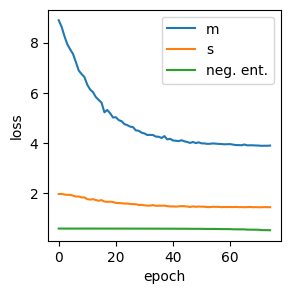

patient2_evaluate_tree1_right_ovary_site
20 unique trees were not found (1 was found). Retry with a higher sample size if you want to get more trees.


<Figure size 300x300 with 0 Axes>

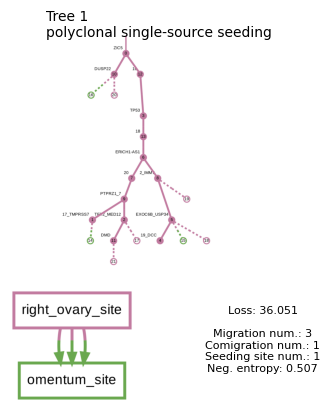

num trees: 52
['adnexa_site', 'omentum_site', 'right_ovary_site']

TREE 1
torch.Size([21, 21])
Calculated batch size: 10752
Restructuring adjacency matrix for patient3_evaluate_tree1_right_ovary_site since root node is not at index 0
tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
         1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
         0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 

100%|██████████| 75/75 [01:06<00:00,  1.12it/s]


{'not primary single-source seeding': 12, 'primary single-source seeding': 10}
No solutions without mistakes detected
# final solutions: 1


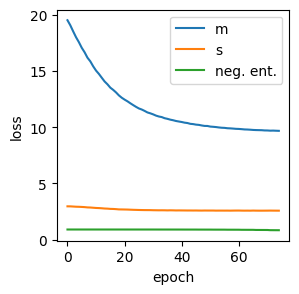

patient3_evaluate_tree1_right_ovary_site
20 unique trees were not found (1 was found). Retry with a higher sample size if you want to get more trees.


<Figure size 300x300 with 0 Axes>

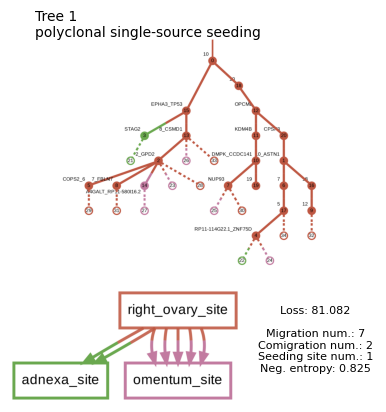

num trees: 10
['left_pelvic_sidewall_site', 'right_ovary_site']

TREE 1
torch.Size([23, 23])
Calculated batch size: 11776
Restructuring adjacency matrix for patient4_evaluate_tree1_right_ovary_site since root node is not at index 0
tensor([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
         0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 

100%|██████████| 75/75 [00:45<00:00,  1.66it/s]


{'not primary single-source seeding': 8, 'primary single-source seeding': 5}
# final solutions: 1


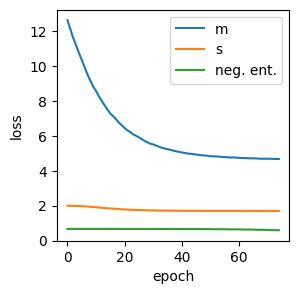

patient4_evaluate_tree1_right_ovary_site
20 unique trees were not found (1 was found). Retry with a higher sample size if you want to get more trees.


<Figure size 300x300 with 0 Axes>

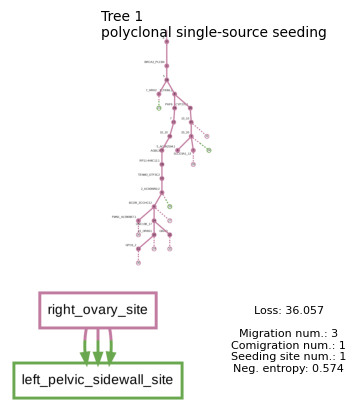

num trees: 59
['brain_metastasis', 'left_ovary_site', 'righ_pelvic_mass']

TREE 1
torch.Size([13, 13])
Calculated batch size: 512
Restructuring adjacency matrix for patient7_evaluate_tree1_left_ovary_site since root node is not at index 0
tensor([[0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 

100%|██████████| 75/75 [00:07<00:00,  9.49it/s]


{'not primary single-source seeding': 13, 'primary single-source seeding': 12}
# final solutions: 8


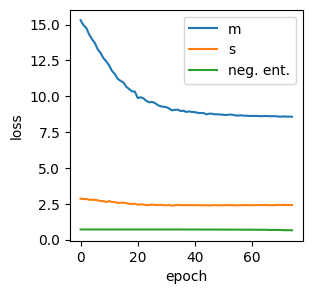

patient7_evaluate_tree1_left_ovary_site
20 unique trees were not found (8 were found). Retry with a higher sample size if you want to get more trees.


<Figure size 300x300 with 0 Axes>

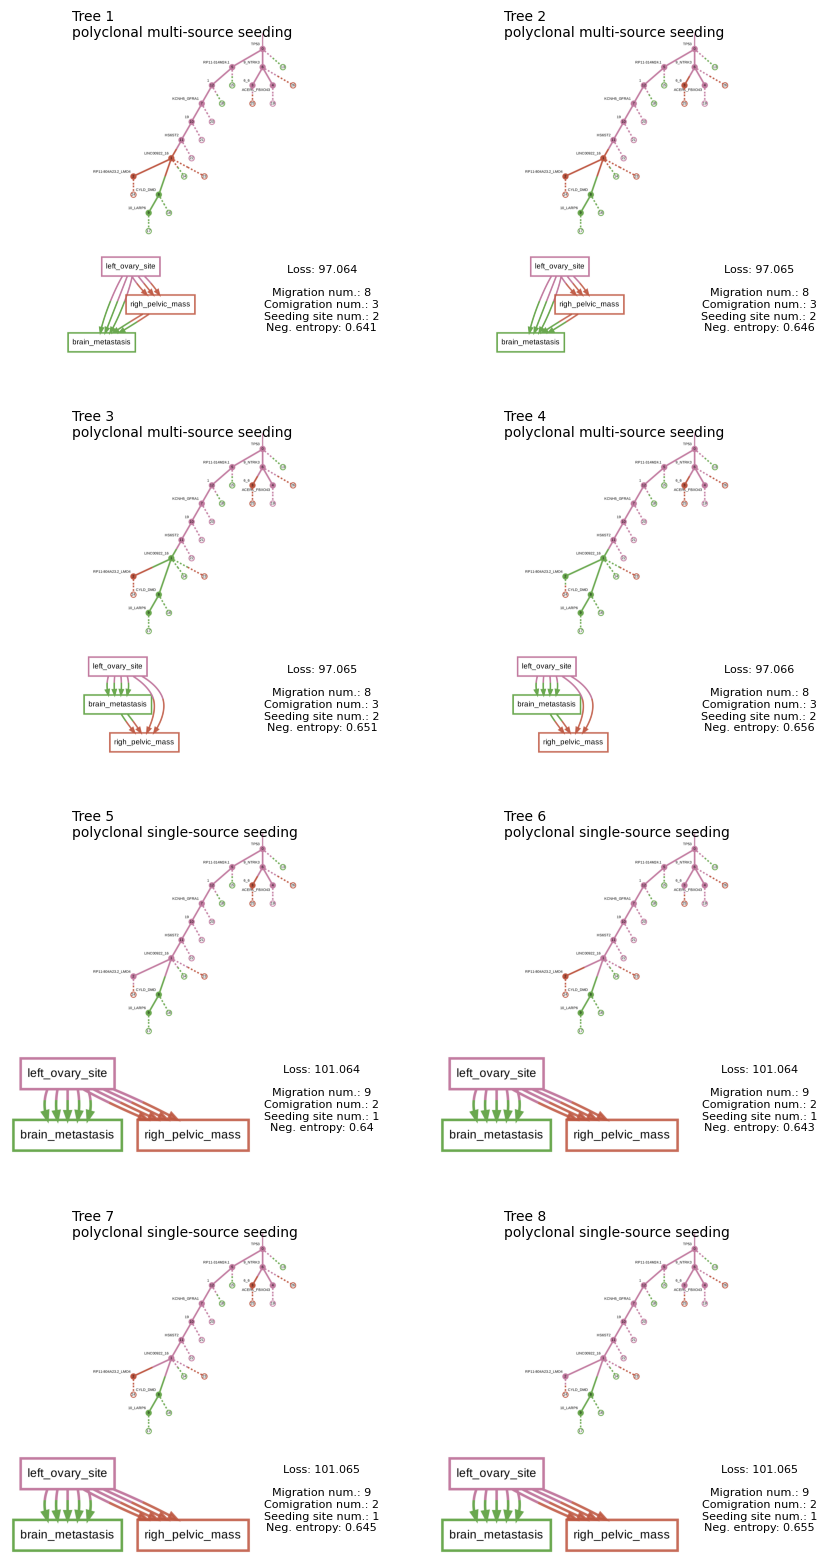

num trees: 1
['left_ovary_site', 'omentum_site', 'right_ovary_site']

TREE 1
torch.Size([10, 10])
Multiple primaries given. Running each as primary
Calculated batch size: 512


100%|██████████| 75/75 [00:06<00:00, 10.81it/s]


{'not primary single-source seeding': 10, 'primary single-source seeding': 9}
# final solutions: 4


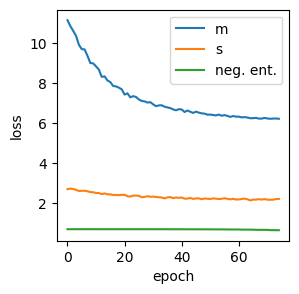

patient9_evaluate_tree1_left_ovary_site
20 unique trees were not found (4 were found). Retry with a higher sample size if you want to get more trees.


<Figure size 300x300 with 0 Axes>

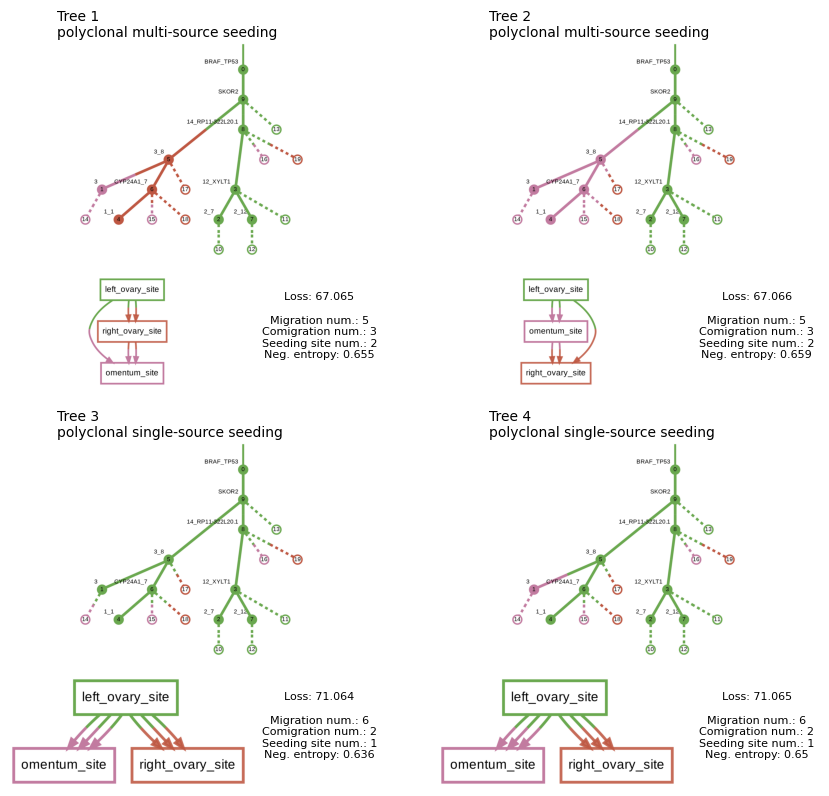

Calculated batch size: 512


100%|██████████| 75/75 [00:12<00:00,  6.15it/s]


{'not primary single-source seeding': 12, 'primary single-source seeding': 9}
# final solutions: 2


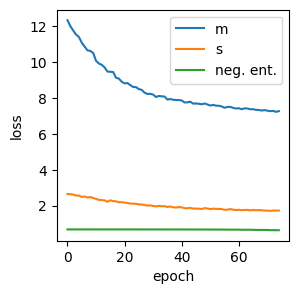

patient9_evaluate_tree1_right_ovary_site
20 unique trees were not found (2 were found). Retry with a higher sample size if you want to get more trees.


<Figure size 300x300 with 0 Axes>

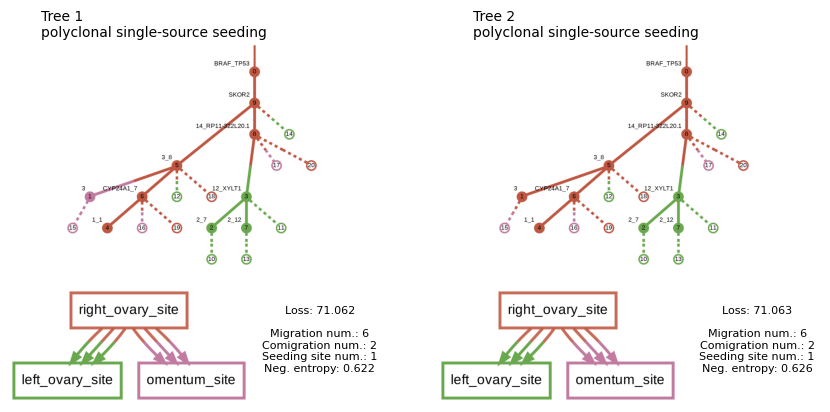

In [4]:
for patient_id in PATIENT_IDS:
    mut_trees_fn = os.path.join(TREE_DIR, f"patient{patient_id}.results.npz")
    ref_var_fn = os.path.join(TSV_DIR, f"patient{patient_id}_clustered_SNVs.tsv")
    weights = Weights(mig=10.0, comig=5.0, seed_site=1.0, gen_dist=0.0, organotrop=0.0)
    
    run_evaluate(mut_trees_fn, ref_var_fn, weights, f"patient{patient_id}_evaluate")
